9
9
k = 279.2816, b = 0.3245


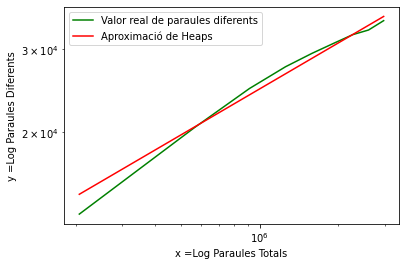

In [16]:
import enchant
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
dict = enchant.Dict("en_US")

a = 1

def func(x, b, c):
    return c/((x+b)**a)

def zipf(xdata,ydata):
    popt, pcov = curve_fit(func, xdata, ydata)
    print('Parametres en funcio de a = %.4f'%a)
    print('b = %.4f, c = %.4f' % (popt[0],popt[1]))
    zipfdata = []
    for num in xdata:
        zipfdata.append(func(num,*popt))
    
    #Choose plot here
    plt.plot(xdata, ydata, 'g-', label='Valor real de la freqüencia')
    plt.plot(xdata, zipfdata,'r-',label='Aproximació de Zipf')
    plt.legend()
    plt.xlabel('x =Rang')
    plt.ylabel('y =Freqüencia')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    
def heaps(xdata,ydata):
    popt, pcov = curve_fit(func2, xdata, ydata)
    print('k = %.4f, b = %.4f' % (popt[0],popt[1]))
    zipfdata = []
    for num in xdata:
        zipfdata.append(func2(num,*popt))
    
    #Choose plot here
    plt.plot(xdata, ydata, 'g-', label='Valor real de paraules diferents')
    plt.plot(xdata, zipfdata,'r-',label='Aproximació de Heaps')
    plt.legend()
    plt.xlabel('x =Log Paraules Totals')
    plt.ylabel('y =Log Paraules Diferents')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

#calculat amb el script de abaix
vectorN = [2974726,2605076,2268991,1931085,1585328,1256901,915030,563125,205443] #total de palabras
vectorD = [34485,32946,32213,30931,29401,27544,24764,20443,13424] #total de palabras distintas

def func2(n,k,b):
    return k * (n**b)


file1 = open('novels_count.txt', 'r')
Lines = file1.readlines()
Result = []
final=False
WordCount=0
EWordCount=0
for string in Lines:
    if(final):
        WordCount=int(string.partition(' ')[0])
        break
    elif (string == '--------------------\n'):
        final=True
    else:
        w=(string.partition(', ')[0],string.partition(', ')[2].rstrip("\n"))
        if (dict.check(w[1]) and not any(chr.isdigit() for chr in w[1])): #mirem si cada string es o no una paraula i si conte algun numero
            Result.append(w)
            EWordCount += int(w[0])
            

Result.reverse()
Result = Result[0:10000]

rank = []
freq =[]
counter=1
total=[]

for w in Result:
    freq.append(int(w[0])/EWordCount)
    rank.append(counter)
    counter=counter+1
    

#zipf(rank,freq)
heaps(vectorN,vectorD)

In [12]:
import enchant
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
dict = enchant.Dict("en_US")


file1 = open('novels8.txt', 'r')
Lines = file1.readlines()
DWordCount=0
TWordCount=0
Result=[]
final=False
for string in Lines:
    if(final):
        DWordCount=int(string.partition(' ')[0])
        #print(DWordCount)
        break
    elif (string == '--------------------\n'):
        final=True
    else:
        w=(string.partition(', ')[0],string.partition(', ')[2].rstrip("\n"))
        if (dict.check(w[1]) and not any(chr.isdigit() for chr in w[1])): #mirem si cada string es o no una paraula i si conte algun numero
            Result.append(w)
            TWordCount += int(w[0])
            
            
DWordCount = len(Result)

print(DWordCount)
print(TWordCount)
            


13424
205443
